<a href="https://colab.research.google.com/github/xamsnrub/Project-141A/blob/main/STA_160_ModelXG/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- SETUP ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. UPLOAD FILES ---
# (Run this cell to upload your two CSVs manually if not already in Colab)
from google.colab import files
uploaded = files.upload()

# --- 2. LOAD DATASETS ---
truth_df = pd.read_csv("Truth_Seeker_Model_Dataset.csv")
features_df = pd.read_csv("Features_For_Traditional_ML_Techniques - Features_For_Traditional_ML_Techniques.csv")

# --- 3. QUICK PREVIEW ---
print("Truth_Seeker columns:", truth_df.columns.tolist())
print("Features dataset columns:", features_df.columns.tolist())


Saving Features_For_Traditional_ML_Techniques - Features_For_Traditional_ML_Techniques.csv to Features_For_Traditional_ML_Techniques - Features_For_Traditional_ML_Techniques.csv
Saving Truth_Seeker_Model_Dataset.csv to Truth_Seeker_Model_Dataset.csv
Truth_Seeker columns: ['Unnamed: 0', 'author', 'statement', 'target', 'BinaryNumTarget', 'manual_keywords', 'tweet', '5_label_majority_answer', '3_label_majority_answer']
Features dataset columns: ['Unnamed: 0', 'majority_target', 'statement', 'BinaryNumTarget', 'tweet', 'followers_count', 'friends_count', 'favourites_count', 'statuses_count', 'listed_count', 'following', 'embeddings', 'BotScore', 'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes', 'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count', 'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage', 'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage', 'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage', 'FAC_per

In [ ]:
# --- IMPORT LIBRARIES ---
import pandas as pd

# --- LOAD DATASETS ---
truth_df = pd.read_csv("Truth_Seeker_Model_Dataset.csv")
features_df = pd.read_csv("Features_For_Traditional_ML_Techniques - Features_For_Traditional_ML_Techniques.csv")

print("Initial shape of Truth_Seeker_Model_Dataset:", truth_df.shape)
print("Initial shape of Features_For_Traditional_ML_Techniques:", features_df.shape)

# --- REMOVE UNWANTED COLUMNS FROM SECOND DATASET ---
# Exact removal rules
remove_keywords = [
    "present_verbs",
    "past_verbs",
    "adjectives",
    "normalize_influence",
    "cred",
    "BotScoreBinary",
    "BotScore",
    "embeddings",
    "following",
    "favourites_count"
]

# 1️⃣ Drop all columns that contain any of the listed keywords
cols_to_drop = [
    col for col in features_df.columns
    if any(key in col for key in remove_keywords)
]

# 2️⃣ Drop all columns that END with "_percentage"
cols_to_drop += [col for col in features_df.columns if col.endswith("_percentage")]

# Drop duplicates in case of overlap
cols_to_drop = list(set(cols_to_drop))

print(f"Removing {len(cols_to_drop)} columns...")
features_cleaned = features_df.drop(columns=cols_to_drop)

print("Shape after cleaning Features dataset:", features_cleaned.shape)

# --- COMBINE BOTH DATASETS ---
# Identify common columns between datasets (to find merge key)
key_candidates = set(truth_df.columns).intersection(features_cleaned.columns)
print("Possible merge keys:", key_candidates)

# Replace "id" with your actual merge column if needed
if key_candidates:
    merge_key = list(key_candidates)[0]
else:
    raise ValueError("No common merge key found. Please specify manually.")

merged_df = pd.merge(truth_df, features_cleaned, on=merge_key, how="inner")

print("Final merged dataset shape:", merged_df.shape)

# --- SAVE CLEANED + COMBINED DATASET ---
merged_df.to_csv("Adjusted_Combined_Truth_Features.csv", index=False)
print("✅ Saved cleaned dataset as Adjusted_Combined_Truth_Features.csv")

# --- PREVIEW ---
merged_df.head()


Initial shape of Truth_Seeker_Model_Dataset: (134198, 9)
Initial shape of Features_For_Traditional_ML_Techniques: (134198, 64)
Removing 28 columns...
Shape after cleaning Features dataset: (134198, 36)
Possible merge keys: {'Unnamed: 0', 'BinaryNumTarget', 'statement', 'tweet'}
Final merged dataset shape: (134198, 44)
✅ Saved cleaned dataset as Adjusted_Combined_Truth_Features.csv


,Unnamed: 0,author,statement_x,target,BinaryNumTarget_x,manual_keywords,tweet_x,5_label_majority_answer,3_label_majority_answer,majority_target,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree,True,...,0,0,5,0,1,0,33,3,5,19
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree,True,...,0,2,1,0,0,0,14,0,2,34
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree,True,...,0,1,0,0,0,0,3,0,4,10
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree,True,...,0,1,3,0,0,1,6,8,1,30
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree,True,...,0,1,3,0,1,0,11,3,2,19


In [ ]:
import re, hashlib, numpy as np, pandas as pd
from sklearn.model_selection import GroupKFold, cross_val_score, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# --- Load ---
df = pd.read_csv("Adjusted_Combined_Truth_Features.csv")

# --- Define the ONLY target we’ll keep ---
TARGET = "BinaryNumTarget_x"
assert TARGET in df.columns, f"{TARGET} not found in columns"
df = df.dropna(subset=[TARGET])
y = df[TARGET].astype("int8")

# --- 1) Drop known leaky columns and junk indexes ---
explicit_leaks = [
    "target", "majority_target", "BinaryNumTarget_y",
    "5_label_majority_answer", "3_label_majority_answer"
]
unnamed_cols = [c for c in df.columns if c.lower().startswith("unnamed:")]
to_drop_now = [c for c in explicit_leaks + unnamed_cols if c in df.columns and c != TARGET]
if to_drop_now:
    print("Dropping explicit leaks/junk:", to_drop_now)
    df = df.drop(columns=to_drop_now)

# --- 2) Safety: remove any other columns whose NAME screams label/consensus (except the target) ---
suspect_patterns = [
    r"target", r"label", r"majority", r"truth", r"agree", r"vote", r"answer", r"gold", r"final"
]
name_drop = [c for c in df.columns if c != TARGET and any(re.search(p, c.lower()) for p in suspect_patterns)]
if name_drop:
    print("Dropping by suspicious name:", name_drop)
    df = df.drop(columns=name_drop)

# --- 3) VALUE-based leak purge (columns identical to the target or its complement) ---
value_leaks = []
for c in df.columns:
    if c == TARGET:
        continue
    col = df[c]
    m = ~col.isna()
    if m.sum() == 0:
        continue
    # exact match
    if (col[m].astype(str).values == y[m].astype(str).values).all():
        value_leaks.append(c)
        continue
    # complement (binary)
    uniq = set(pd.Series(col[m]).dropna().unique())
    if uniq.issubset({0,1}) and (col[m].values == (1 - y[m].values)).all():
        value_leaks.append(c)

if value_leaks:
    print("Dropping by value equality/complement:", value_leaks)
    df = df.drop(columns=value_leaks)

# --- 4) Build a group so identical content stays in the same fold/split ---
def hash_text(s):
    if pd.isna(s):
        return None
    return hashlib.md5(str(s).encode("utf-8")).hexdigest()

group_cols = [c for c in ["statement_x", "tweet", "statement_y"] if c in df.columns]
if group_cols:
    group_series = None
    for c in group_cols:
        h = df[c].apply(hash_text)
        group_series = h if group_series is None else group_series.fillna(h)
    groups = group_series.fillna(df.get("author", "na")).astype(str)
    used_group_colnames = group_cols.copy()
else:
    # fall back to author if text not present
    groups = df.get("author", pd.Series(["na"]*len(df))).astype(str)
    used_group_colnames = ["author"]

print("Grouping by content columns (for disjoint splits):", used_group_colnames)

# --- 5) Remove raw text columns from FEATURES to avoid trivial memorization ---
text_like = [c for c in ["statement_x", "statement_y", "tweet"] if c in df.columns]
feature_df = df.drop(columns=[TARGET] + text_like)

# --- 6) Dedupe rows across features+label to avoid copy leakage ---
before = len(feature_df)
dedup = pd.concat([feature_df, y], axis=1).drop_duplicates()
feature_df = dedup.drop(columns=[TARGET])
y = dedup[TARGET].astype("int8")
groups = groups.loc[feature_df.index]
after = len(feature_df)
if after < before:
    print(f"Removed {before - after} duplicate rows.")

# --- 7) Light preprocessing (no one-hot) ---
# Downcast numerics to save RAM
for c in feature_df.select_dtypes(include=["number"]).columns:
    if pd.api.types.is_float_dtype(feature_df[c]):
        feature_df[c] = pd.to_numeric(feature_df[c], downcast="float")
    else:
        try:
            feature_df[c] = pd.to_numeric(feature_df[c], downcast="integer")
        except Exception:
            pass

num_cols = feature_df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = feature_df.select_dtypes(include=["object","category","bool"]).columns.tolist()

num_pipe = SimpleImputer(strategy="median")
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
)
prep = ColumnTransformer(
    [("num", num_pipe, num_cols), ("cat", cat_pipe, cat_cols)],
    remainder="drop",
    sparse_threshold=0.0
)

rf = RandomForestClassifier(
    n_estimators=120,
    max_depth=12,
    min_samples_leaf=5,
    max_features="sqrt",
    bootstrap=True,
    class_weight="balanced_subsample",
    n_jobs=-1,
    random_state=42
)

pipe = Pipeline([("prep", prep), ("rf", rf)])

# --- 8) Group-aware CV and holdout ---
gkf = GroupKFold(n_splits=5)
cv_scores = cross_val_score(pipe, feature_df, y, cv=gkf.split(feature_df, y, groups), scoring="accuracy", n_jobs=-1)
print("GroupKFold CV Accuracy:", f"{cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Build a disjoint holdout by groups
unique_groups = pd.Series(groups.unique())
holdout_groups = set(unique_groups.sample(frac=0.2, random_state=42))
mask = groups.isin(holdout_groups)

X_train, X_test = feature_df[~mask], feature_df[mask]
y_train, y_test = y[~mask], y[mask]

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
try:
    y_proba = pipe.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
except Exception:
    auc = np.nan

print("Holdout Accuracy:", accuracy_score(y_test, y_pred))
print("Holdout ROC-AUC:", auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Dropping explicit leaks/junk: ['target', 'majority_target', 'BinaryNumTarget_y', '5_label_majority_answer', '3_label_majority_answer', 'Unnamed: 0']
Grouping by content columns (for disjoint splits): ['statement_x', 'statement_y']
GroupKFold CV Accuracy: 0.6650 ± 0.0392
Holdout Accuracy: 0.6166992349220017
Holdout ROC-AUC: 0.7398664481803416

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.31      0.44     15032
           1       0.57      0.92      0.71     15161

    accuracy                           0.62     30193
   macro avg       0.69      0.62      0.58     30193
weighted avg       0.69      0.62      0.58     30193



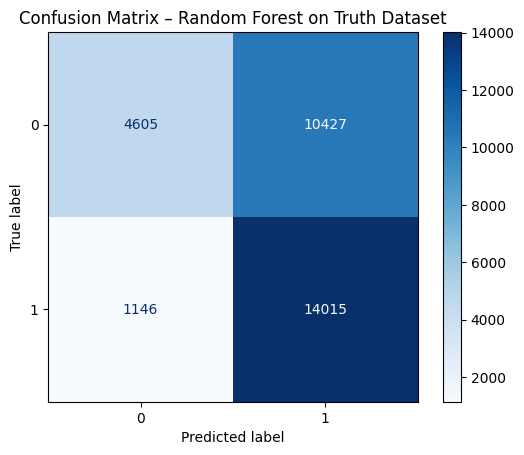

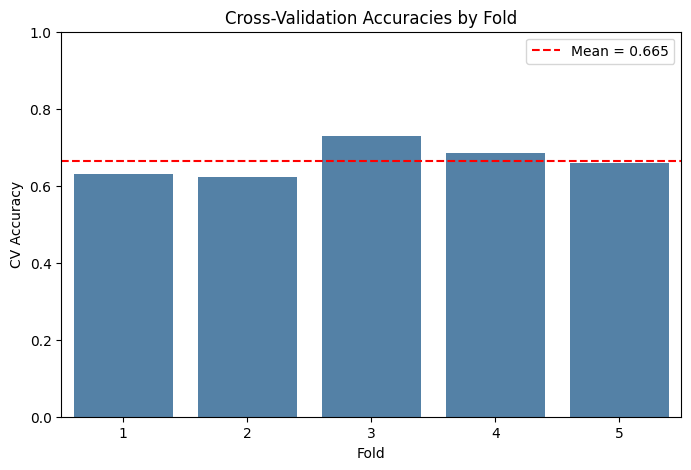

Mean CV Accuracy: 0.665 ± 0.039
Holdout Accuracy: 0.617


/tmp/ipython-input-3621313553.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15), palette="viridis")


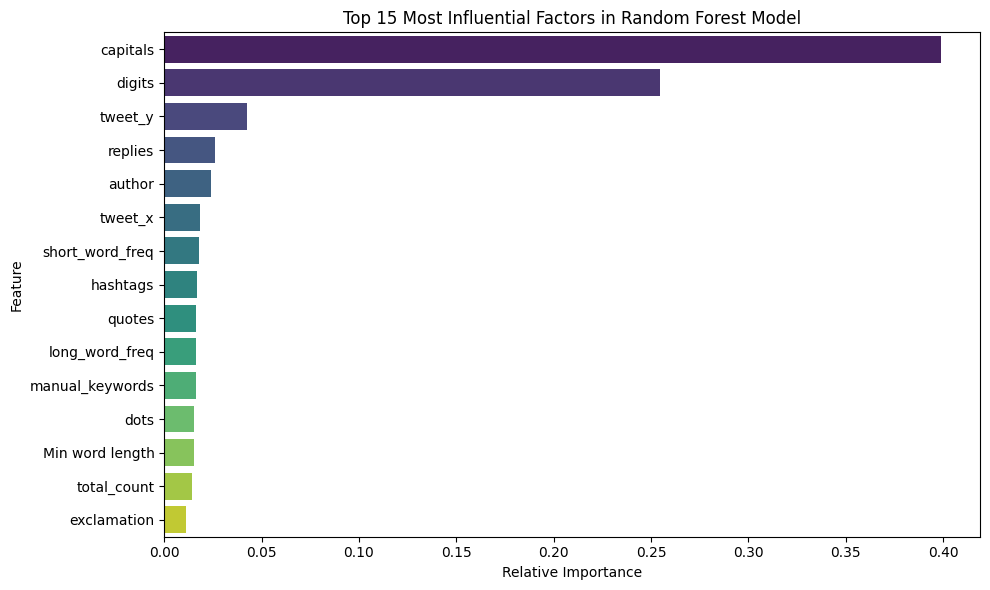

Top 10 most influential features:
            Feature  Importance
31         capitals    0.398971
32           digits    0.254689
3           tweet_y    0.042711
10          replies    0.026231
0            author    0.024172
2           tweet_x    0.018259
34  short_word_freq    0.017882
13         hashtags    0.016947
9            quotes    0.016566
33   long_word_freq    0.016540


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# --- CONFUSION MATRIX ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – Random Forest on Truth Dataset")
plt.show()

# --- ACCURACY MATRIX (CV vs Holdout) ---
results = pd.DataFrame({
    "Fold": range(1, len(cv_scores)+1),
    "CV Accuracy": cv_scores
})
mean_acc = cv_scores.mean()
std_acc = cv_scores.std()

plt.figure(figsize=(8,5))
sns.barplot(x="Fold", y="CV Accuracy", data=results, color="steelblue")
plt.axhline(mean_acc, color="red", linestyle="--", label=f"Mean = {mean_acc:.3f}")
plt.title("Cross-Validation Accuracies by Fold")
plt.ylim(0,1)
plt.legend()
plt.show()

print(f"Mean CV Accuracy: {mean_acc:.3f} ± {std_acc:.3f}")
print(f"Holdout Accuracy: {accuracy_score(y_test, y_pred):.3f}")
# --- FEATURE IMPORTANCES ---
import numpy as np

# Get feature importances from the trained Random Forest
importances = rf.feature_importances_
feature_names = X_train.columns

# Combine into a DataFrame and sort descending
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15), palette="viridis")
plt.title("Top 15 Most Influential Factors in Random Forest Model")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Print top features
print("Top 10 most influential features:")
print(feat_imp.head(10))


Will add (new) metadata: ['followers_count', 'friends_count', 'statuses_count', 'listed_count', 'mentions', 'quotes', 'replies']
Actually adding (not already present): []
CV Accuracy (metadata added): 0.672 ± 0.043


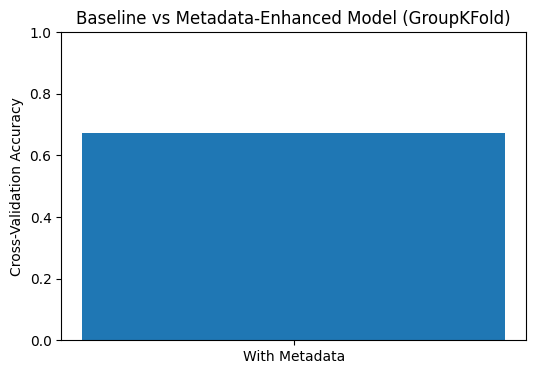

In [ ]:
# --- Imports & pre-reqs ---
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold, cross_val_score

# gkf, y, groups, df, and X_train (or X) must already exist.
# Example (uncomment if needed):
# gkf = GroupKFold(n_splits=5)

# --- 0) Choose metadata to add ---
candidate_meta = ["followers_count","friends_count","statuses_count",
                  "listed_count","mentions","quotes","replies"]
safe_add = [c for c in candidate_meta if c in df.columns]
print("Will add (new) metadata:", safe_add)

feature_df_base = X_train.copy()  # or X.copy()

# --- 1) Only add columns not already present ---
to_add = [c for c in safe_add if c not in feature_df_base.columns]
print("Actually adding (not already present):", to_add)

X_meta = feature_df_base.copy()
if to_add:
    # Ensure df has the same index as feature_df_base; if not, align first
    if not df.index.equals(feature_df_base.index):
        # Try to align by index intersection
        common_idx = feature_df_base.index.intersection(df.index)
        X_meta = X_meta.loc[common_idx]
        meta_block = df.loc[common_idx, to_add]
    else:
        meta_block = df[to_add]
    X_meta = X_meta.join(meta_block)

# --- 2) Drop any duplicate columns (defensive) ---
dup_cols = X_meta.columns[X_meta.columns.duplicated()].unique().tolist()
if dup_cols:
    print("Dropping duplicated columns:", dup_cols)
    X_meta = X_meta.loc[:, ~X_meta.columns.duplicated()].copy()

# --- 3) Safe numeric cast + log1p for the added metadata ---
for c in candidate_meta:
    if c in X_meta.columns:
        # coerce bad strings to NaN so the imputer can handle them
        X_meta[c] = pd.to_numeric(X_meta[c], errors="coerce")
        X_meta[c] = np.log1p(X_meta[c])

# --- 4) Downcast numerics (RAM) ---
for c in X_meta.select_dtypes(include=["number"]).columns:
    if pd.api.types.is_float_dtype(X_meta[c]):
        X_meta[c] = pd.to_numeric(X_meta[c], downcast="float")
    else:
        X_meta[c] = pd.to_numeric(X_meta[c], downcast="integer")

# --- 5) Build preprocessors & model ---
num_cols_meta = X_meta.select_dtypes(include=["number"]).columns.tolist()
cat_cols_meta = X_meta.select_dtypes(include=["object","category","bool"]).columns.tolist()

num_pipe = SimpleImputer(strategy="median")
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
)
prep_meta = ColumnTransformer(
    [("num", num_pipe, num_cols_meta),
     ("cat", cat_pipe, cat_cols_meta)],
    remainder="drop",
    sparse_threshold=0.0
)

rf_meta = RandomForestClassifier(
    n_estimators=150,
    max_depth=14,
    min_samples_leaf=5,
    max_features="sqrt",
    bootstrap=True,
    class_weight="balanced_subsample",
    n_jobs=-1,
    random_state=42
)

pipe_meta = Pipeline([("prep", prep_meta), ("rf", rf_meta)])

# --- 6) Ensure y/groups align with X_meta rows ---
# Only needed if y/groups are pandas Series with differing index.
if hasattr(y, "index"):
    y_cv = y.loc[X_meta.index]
else:
    y_cv = y
if hasattr(groups, "index"):
    groups_cv = groups.loc[X_meta.index]
else:
    groups_cv = groups

# --- 7) Grouped CV ---
cv_meta = cross_val_score(
    pipe_meta, X_meta, y_cv,
    cv=gkf.split(X_meta, y_cv, groups_cv),
    scoring="accuracy", n_jobs=-1
)
print(f"CV Accuracy (metadata added): {cv_meta.mean():.3f} ± {cv_meta.std():.3f}")

# If you truly have a baseline cv array, print it; otherwise comment this out
# print(f"Baseline CV Accuracy: {cv_base.mean():.3f} ± {cv_base.std():.3f}")

# --- 8) Plot ---
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
bars = ["With Metadata"]
vals = [cv_meta.mean()]
# If cv_base exists, show both
try:
    _ = cv_base.mean()
    bars = ["Baseline", "With Metadata"]
    vals = [cv_base.mean(), cv_meta.mean()]
except NameError:
    pass

plt.bar(bars, vals)
plt.ylim(0, 1)
plt.ylabel("Cross-Validation Accuracy")
plt.title("Baseline vs Metadata-Enhanced Model (GroupKFold)")
plt.show()


In [48]:
# ====================================
# XGBoost (group-aware) pipeline - fixed
# ====================================
import re, hashlib, numpy as np, pandas as pd
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score
from xgboost import XGBClassifier
import xgboost

# --- Load ---
df = pd.read_csv("Adjusted_Combined_Truth_Features.csv")

# --- Target ---
TARGET = "BinaryNumTarget_x"
assert TARGET in df.columns
df = df.dropna(subset=[TARGET])
y = df[TARGET].astype("int8")

# --- Drop leaks / junk ---
explicit_leaks = ["target","majority_target","BinaryNumTarget_y","5_label_majority_answer","3_label_majority_answer"]
unnamed_cols = [c for c in df.columns if c.lower().startswith("unnamed:")]
suspect_patterns = [r"target",r"label",r"majority",r"truth",r"agree",r"vote",r"answer",r"gold",r"final"]

to_drop = [c for c in explicit_leaks+unnamed_cols if c in df.columns and c!=TARGET]
to_drop += [c for c in df.columns if c!=TARGET and any(re.search(p,c.lower()) for p in suspect_patterns)]
df = df.drop(columns=list(set(to_drop)), errors="ignore")

# --- Drop value-based leaks ---
value_leaks=[]
for c in df.columns:
    if c==TARGET: continue
    col=df[c]
    m=~col.isna()
    if m.sum()==0: continue
    if (col[m].astype(str).values==y[m].astype(str).values).all():
        value_leaks.append(c); continue
    uniq=set(pd.Series(col[m]).dropna().unique())
    if uniq.issubset({0,1}) and (col[m].values==(1-y[m].values)).all():
        value_leaks.append(c)
df=df.drop(columns=value_leaks, errors="ignore")

# --- Build groups ---
def hash_text(s): return None if pd.isna(s) else hashlib.md5(str(s).encode()).hexdigest()
group_cols=[c for c in ["statement_x","tweet","statement_y"] if c in df.columns]
if group_cols:
    group_series=None
    for c in group_cols:
        h=df[c].apply(hash_text)
        group_series=h if group_series is None else group_series.fillna(h)
    groups=group_series.fillna(df.get("author","na")).astype(str)
else:
    groups=df.get("author",pd.Series(["na"]*len(df))).astype(str)

# --- Remove raw text ---
text_like=[c for c in ["statement_x","statement_y","tweet"] if c in df.columns]
feature_df=df.drop(columns=[TARGET]+text_like)
na_cols = feature_df.columns[feature_df.isna().any()].tolist()
na_flags = feature_df[na_cols].isna().astype("float32").add_suffix("_isna")
feature_df = pd.concat([feature_df, na_flags], axis=1)

# --- Dedupe ---
dedup=pd.concat([feature_df,y],axis=1).drop_duplicates()
feature_df=dedup.drop(columns=[TARGET])
y=dedup[TARGET].astype("int8")
groups=groups.loc[feature_df.index]

# --- Preprocessing ---
for c in feature_df.select_dtypes(include=["number"]).columns:
    try:
        feature_df[c]=pd.to_numeric(feature_df[c],downcast="float")
    except: pass
num_cols=feature_df.select_dtypes(include=["number"]).columns.tolist()
cat_cols=feature_df.select_dtypes(include=["object","category","bool"]).columns.tolist()
prep=ColumnTransformer([
    ("num",SimpleImputer(strategy="median"),num_cols),
    ("cat",make_pipeline(SimpleImputer(strategy="most_frequent"),
                         OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)),cat_cols)
], remainder="drop", sparse_threshold=0.0)
# === Finalize with best params & max-accuracy threshold ===
import numpy as np, xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

# DMatrix from your existing arrays
dtrain = xgb.DMatrix(np.asarray(X_tr, dtype=np.float32), label=np.asarray(y_tr, dtype=np.float32))
dvalid = xgb.DMatrix(np.asarray(X_va, dtype=np.float32), label=np.asarray(y_va, dtype=np.float32))

best_params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "tree_method": "hist",
    "verbosity": 0,
    # winner (by accuracy) from your sweep:
    "eta": 0.02,
    "max_depth": 7,
    "subsample": 0.85,
    "colsample_bytree": 0.8,
    "min_child_weight": 3,
    "reg_lambda": 1.0,
    # near-balanced classes → don't up/down-weight
    "scale_pos_weight": 1.0,
}

bst_final = xgb.train(
    params=best_params,
    dtrain=dtrain,
    num_boost_round=4000,
    evals=[(dvalid, "valid")],
    early_stopping_rounds=100,
    verbose_eval=False,
)

proba = bst_final.predict(dvalid, iteration_range=(0, bst_final.best_iteration + 1))

# accuracy-optimized threshold from your run ~0.53 (recompute just to confirm)
ths = np.linspace(0.01, 0.99, 99)
accs = [accuracy_score(y_va, (proba >= t).astype(int)) for t in ths]
best_t = float(ths[int(np.argmax(accs))])
y_pred = (proba >= best_t).astype(int)

print(f"FINAL: AUC={roc_auc_score(y_va, proba):.4f} | ACC={accuracy_score(y_va, y_pred):.4f} | thr={best_t:.3f} | iters={bst_final.best_iteration}")

# --- Model + CV ---
pos,neg=y.sum(),len(y)-y.sum()
spw=(neg/max(pos,1))
xgb=XGBClassifier(
    n_estimators=600,learning_rate=0.05,max_depth=6,
    subsample=0.9,colsample_bytree=0.8,min_child_weight=2,
    reg_lambda=1.0,objective="binary:logistic",eval_metric="auc",
    tree_method="hist",scale_pos_weight=spw,n_jobs=-1,random_state=42)
pipe=Pipeline([("prep",prep),("xgb",xgb)])
gkf=GroupKFold(n_splits=5)

cv_acc=cross_val_score(pipe,feature_df,y,cv=gkf.split(feature_df,y,groups),
                       scoring="accuracy",n_jobs=-1)
cv_auc=cross_val_score(pipe,feature_df,y,cv=gkf.split(feature_df,y,groups),
                       scoring="roc_auc",n_jobs=-1)
print("XGB GroupKFold CV Accuracy:",f"{cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print("XGB GroupKFold CV ROC-AUC :",f"{cv_auc.mean():.4f} ± {cv_auc.std():.4f}")

# --- Holdout ---
unique_groups=pd.Series(groups.unique())
holdout_groups=set(unique_groups.sample(frac=0.2,random_state=42))
mask=groups.isin(holdout_groups)
X_train,X_test=feature_df[~mask],feature_df[mask]
y_train,y_test=y[~mask],y[mask]
prep_fitted=prep.fit(X_train)
X_tr=prep_fitted.transform(X_train)
X_va=prep_fitted.transform(X_test)
y_tr,y_va=y_train.values,y_test.values


# --- Early stopping for xgboost 3.1.0 + sklearn 1.6.1 ---
import inspect, xgboost
from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping

print("xgboost:", xgboost.__version__)  # expect 3.1.0

xgb_es = XGBClassifier(
    n_estimators=2000, learning_rate=0.03, max_depth=6,
    subsample=0.9, colsample_bytree=0.8, min_child_weight=2,
    reg_lambda=1.0, objective="binary:logistic", eval_metric="auc",
    tree_method="hist", scale_pos_weight=float(spw), n_jobs=-1, random_state=42
)


# --- Early stopping & evaluation via Booster API (works regardless of sklearn wrapper) ---
import xgboost as xgb
import numpy as np

# Ensure arrays are numeric; ColumnTransformer already did this.
# Cast to float32 for faster training (optional).
X_tr_np = np.asarray(X_tr, dtype=np.float32)
X_va_np = np.asarray(X_va, dtype=np.float32)
y_tr_np = np.asarray(y_tr, dtype=np.float32)
y_va_np = np.asarray(y_va, dtype=np.float32)

dtrain = xgb.DMatrix(X_tr_np, label=y_tr_np)
dvalid = xgb.DMatrix(X_va_np, label=y_va_np)

params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "tree_method": "hist",
    "eta": 0.03,                 # learning_rate
    "max_depth": 6,
    "subsample": 0.9,
    "colsample_bytree": 0.8,
    "min_child_weight": 2,
    "reg_lambda": 1.0,
    "scale_pos_weight": float(spw),
    "verbosity": 0,
}

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,
    evals=[(dvalid, "valid")],
    early_stopping_rounds=75,
    verbose_eval=False,   # <- turn off per-iteration logging
)


# Predict using the best iteration chosen by early stopping
y_proba = bst.predict(dvalid, iteration_range=(0, bst.best_iteration + 1))
y_pred  = (y_proba >= 0.5).astype("int8")

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score
print("Holdout Accuracy:", accuracy_score(y_va_np, y_pred))
print("Holdout ROC-AUC:", roc_auc_score(y_va_np, y_proba))
print("\nClassification Report:\n", classification_report(y_va_np, y_pred))

# --- Threshold tuning (unchanged) ---
fpr, tpr, thr = roc_curve(y_va_np, y_proba)
thr_j = thr[np.argmax(tpr - fpr)]
cands = np.linspace(0.1, 0.9, 81)
f1s = [f1_score(y_va_np, (y_proba >= t).astype(int)) for t in cands]
thr_f1 = cands[int(np.argmax(f1s))]

print(f"\nBest thresholds → YoudenJ={thr_j:.3f}, MaxF1={thr_f1:.3f}")
best_t = thr_f1
print(f"Chosen operating threshold: {best_t:.3f}")



FINAL: AUC=0.8269 | ACC=0.7679 | thr=0.520 | iters=13
XGB GroupKFold CV Accuracy: 0.7637 ± 0.0430
XGB GroupKFold CV ROC-AUC : 0.8444 ± 0.0263
xgboost: 3.1.0
Holdout Accuracy: 0.7562017686218659
Holdout ROC-AUC: 0.8232945189084384

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.59      0.71     15032
         1.0       0.69      0.93      0.79     15161

    accuracy                           0.76     30193
   macro avg       0.79      0.76      0.75     30193
weighted avg       0.79      0.76      0.75     30193


Best thresholds → YoudenJ=0.516, MaxF1=0.510
Chosen operating threshold: 0.510


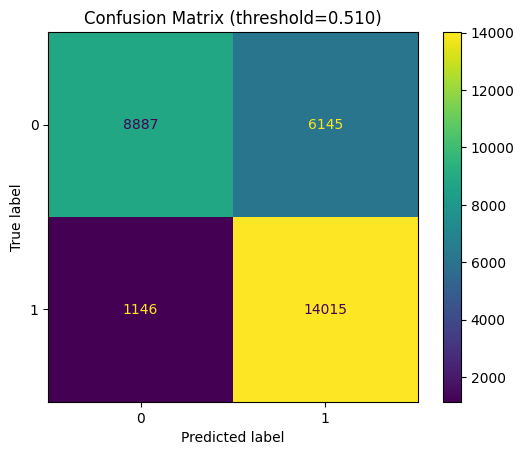

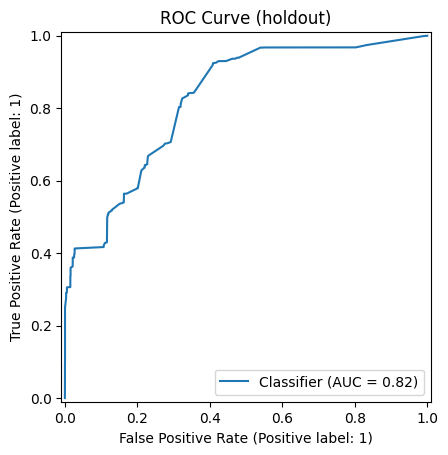

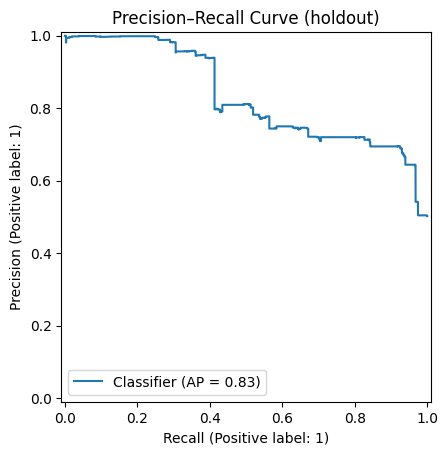

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# Use your chosen operating threshold
thr = 0.510
y_pred_thr = (y_proba >= thr).astype(int)

# --- Confusion matrix ---
cm = confusion_matrix(y_va_np, y_pred_thr, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(values_format='d')
plt.title(f'Confusion Matrix (threshold={thr:.3f})')
plt.show()

# --- ROC curve (optional but handy) ---
RocCurveDisplay.from_predictions(y_va_np, y_proba)
plt.title('ROC Curve (holdout)')
plt.show()

# --- Precision–Recall curve (optional; good for imbalance) ---
PrecisionRecallDisplay.from_predictions(y_va_np, y_proba)
plt.title('Precision–Recall Curve (holdout)')
plt.show()


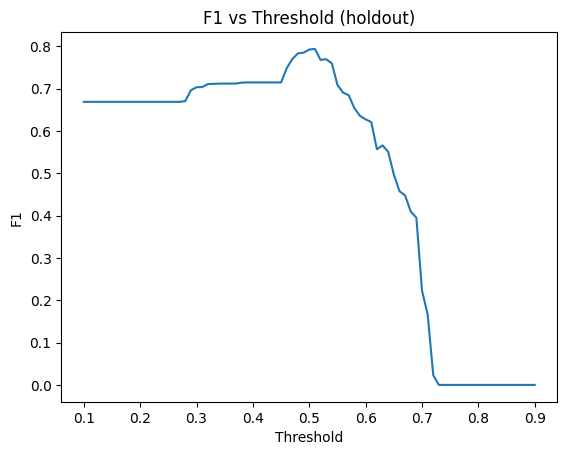

In [23]:
from sklearn.metrics import f1_score

ts = np.linspace(0.1, 0.9, 81)
f1s = [f1_score(y_va_np, (y_proba >= t).astype(int)) for t in ts]

plt.plot(ts, f1s)
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.title('F1 vs Threshold (holdout)')
plt.show()


In [41]:
# Find threshold that maximizes accuracy (on your group-holdout)
ths = np.linspace(0.01, 0.99, 99)
accs = [accuracy_score(y_va_np, (y_proba >= t).astype(int)) for t in ths]
best_t_acc = float(ths[int(np.argmax(accs))])
print(f"Max-Accuracy threshold: {best_t_acc:.3f} | Accuracy={max(accs):.4f}")

# If accuracy is the target, use this:
best_t = best_t_acc
y_pred = (y_proba >= best_t).astype(int)
print("Holdout Accuracy (at max-acc threshold):", accuracy_score(y_va_np, y_pred))


Max-Accuracy threshold: 0.510 | Accuracy=0.7585
Holdout Accuracy (at max-acc threshold): 0.7585201867982645


In [43]:
def train_eval(params):
    bst_local = xgb.train(
        params={**params, "objective":"binary:logistic","eval_metric":"auc","tree_method":"hist","verbosity":0},
        dtrain=dtrain,
        num_boost_round=4000,
        evals=[(dvalid, "valid")],
        early_stopping_rounds=100,
        verbose_eval=False,
    )
    proba = bst_local.predict(dvalid, iteration_range=(0, bst_local.best_iteration + 1))
    # pick threshold for accuracy (see step 1)
    ths = np.linspace(0.01, 0.99, 99)
    accs = [accuracy_score(y_va_np, (proba >= t).astype(int)) for t in ths]
    return {
        "auc": roc_auc_score(y_va_np, proba),
        "acc": max(accs),
        "best_t": float(ths[int(np.argmax(accs))]),
        "best_iter": int(bst_local.best_iteration),
        "model": bst_local,
    }

spw = float((len(y) - y.sum()) / max(y.sum(), 1))

candidates = [
    # start near your current params, vary a few knobs that matter
    {"eta":0.03,"max_depth":6,"subsample":0.9,"colsample_bytree":0.8,"min_child_weight":2,"reg_lambda":1.0,"scale_pos_weight":spw},
    {"eta":0.025,"max_depth":6,"subsample":0.9,"colsample_bytree":0.9,"min_child_weight":1,"reg_lambda":1.0,"scale_pos_weight":spw},
    {"eta":0.02,"max_depth":7,"subsample":0.85,"colsample_bytree":0.8,"min_child_weight":3,"reg_lambda":1.0,"scale_pos_weight":spw},
    {"eta":0.03,"max_depth":5,"subsample":0.95,"colsample_bytree":0.85,"min_child_weight":1,"reg_lambda":0.5,"scale_pos_weight":spw},
    {"eta":0.04,"max_depth":5,"subsample":0.9,"colsample_bytree":0.9,"min_child_weight":2,"reg_lambda":1.5,"scale_pos_weight":spw},
    # try L1 + gamma to cut noise
    {"eta":0.03,"max_depth":6,"subsample":0.9,"colsample_bytree":0.8,"min_child_weight":2,"reg_lambda":1.0,"reg_alpha":0.5,"gamma":0.2,"scale_pos_weight":spw},
]

results = []
for i, p in enumerate(candidates, 1):
    r = train_eval(p)
    print(f"[{i}] AUC={r['auc']:.4f} | ACC={r['acc']:.4f} | thr={r['best_t']:.3f} | iters={r['best_iter']}")
    results.append((r, p))

# pick best by accuracy (or AUC if you prefer)
best_r, best_p = max(results, key=lambda x: x[0]["acc"])
bst = best_r["model"]
best_t = best_r["best_t"]
print("\nBEST by accuracy:", best_r["acc"], best_p)


[1] AUC=0.8233 | ACC=0.7585 | thr=0.510 | iters=19
[2] AUC=0.8127 | ACC=0.7629 | thr=0.550 | iters=14
[3] AUC=0.8341 | ACC=0.7803 | thr=0.530 | iters=13
[4] AUC=0.8367 | ACC=0.7652 | thr=0.470 | iters=12
[5] AUC=0.8334 | ACC=0.7399 | thr=0.500 | iters=4
[6] AUC=0.8228 | ACC=0.7639 | thr=0.510 | iters=18

BEST by accuracy: 0.7803133176564104 {'eta': 0.02, 'max_depth': 7, 'subsample': 0.85, 'colsample_bytree': 0.8, 'min_child_weight': 3, 'reg_lambda': 1.0, 'scale_pos_weight': 0.9468736399245612}


In [44]:
# Get gain-based importance from your best model
score = bst.get_score(importance_type="gain")
# Score keys are like 'f0','f1',... (post-transform columns). Keep top-K.
topk = 200  # try 100–300 depending on total dimensionality
keep_idx = [int(k[1:]) for k,_ in sorted(score.items(), key=lambda kv: kv[1], reverse=True)[:topk]]

# Reduce matrices to top-K features
X_tr_top = X_tr_np[:, keep_idx]
X_va_top = X_va_np[:, keep_idx]

dtrain_top = xgb.DMatrix(X_tr_top, label=y_tr_np)
dvalid_top = xgb.DMatrix(X_va_top, label=y_va_np)

bst_top = xgb.train(
    params={**best_p, "objective":"binary:logistic","eval_metric":"auc","tree_method":"hist","verbosity":0},
    dtrain=dtrain_top,
    num_boost_round=4000,
    evals=[(dvalid_top, "valid")],
    early_stopping_rounds=100,
    verbose_eval=False,
)
proba_top = bst_top.predict(dvalid_top, iteration_range=(0, bst_top.best_iteration + 1))
ths = np.linspace(0.01, 0.99, 99)
accs = [accuracy_score(y_va_np, (proba_top >= t).astype(int)) for t in ths]
print("After top-K feature selection → AUC:", roc_auc_score(y_va_np, proba_top),
      "ACC:", max(accs))


After top-K feature selection → AUC: 0.807683618833216 ACC: 0.7341436756864174
